In [1]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import palettable as pal
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


# Comparative Transrate metrics

* Proportion of references with a CRB-BLAST hit 
* Reciprocal best hits where the top match in one direction is the same as the top match in the other direction. 
* Selects all alignments with e-values below the cutoff for each length as high-confidence predicted homologs
* Metrics: http://hibberdlab.com/transrate/metrics.html

### Linking MMETSP and SRR number 
- Enable cross comparison of the NCGR to Trinity assemblies

In [2]:
sra_run = pd.read_csv('../SraRunInfo_719.csv')
sra_map = sra_run[['Run', 'SampleName']]


In [3]:
# reference-based transrate evaluation
file_trinity2016_v_trinity2014 = "../assembly_evaluation_data/trinity2014_trinity2.2.0_transrate_reference.csv"
file_trinity2014_v_trinity2016 = "../assembly_evaluation_data/trinity2014_trinity2.2.0_transrate_reverse.csv"

In [4]:
# Load in df and add the mmetsp/sra information
trinity2016_v_trinity2014 = pd.read_csv(file_trinity2016_v_trinity2014,index_col="Run")
trinity2014_v_trinity2016 = pd.read_csv(file_trinity2014_v_trinity2016,index_col="Run")

In [5]:
trinity2016_v_trinity2014.head()

,assembly,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,n_over_10k,n_with_orf,...,p_cov75,cov85,p_cov85,cov95,p_cov95,reference_coverage,score,optimal_score,cutoff,SampleName
Run,,,,,,,,,,,,,,,,,,,,,
MMETSP0593,/mnt/scratch/ljcohen/mmetsp/MMETSP0593/trinity...,31357,201,8752,26553964,846.82731,0,9122,0,16223,...,0.82175,20115,0.80373,19355,0.77336,0.82519,NaN,NaN,NaN,MMETSP0593
MMETSP1362,/mnt/scratch/ljcohen/mmetsp/MMETSP1362/trinity...,29356,201,16377,26659768,908.15397,0,9301,5,14175,...,0.84105,21798,0.83148,21398,0.81622,0.85887,NaN,NaN,NaN,MMETSP1362
MMETSP1315,/mnt/scratch/ljcohen/mmetsp/MMETSP1315/trinity...,23145,201,7784,17036932,736.09557,0,5291,0,11397,...,0.82822,16013,0.81408,15531,0.78958,0.80911,NaN,NaN,NaN,MMETSP1315
MMETSP1386,/mnt/scratch/ljcohen/mmetsp/MMETSP1386/trinity...,12696,201,19890,22175178,1746.62713,0,7760,40,10096,...,0.79076,9258,0.78365,9127,0.77256,0.78717,NaN,NaN,NaN,MMETSP1386
MMETSP1085,/mnt/scratch/ljcohen/mmetsp/MMETSP1085/trinity...,10979,201,13406,14129642,1286.96985,0,5417,6,7943,...,0.84983,7992,0.84402,7902,0.83451,0.85208,NaN,NaN,NaN,MMETSP1085


In [6]:
trinity2014_v_trinity2016.head()

,assembly,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,n_over_10k,n_with_orf,...,p_cov75,cov85,p_cov85,cov95,p_cov95,reference_coverage,score,optimal_score,cutoff,SampleName
Run,,,,,,,,,,,,,,,,,,,,,
MMETSP0593,/mnt/scratch/ljcohen/mmetsp_assemblies/Skeleto...,25027,201,9656,24649577,984.91937,0,8856,0,13518,...,0.60395,18736,0.59751,18281,0.58300,0.64261,NaN,NaN,NaN,MMETSP0593
MMETSP1362,/mnt/scratch/ljcohen/mmetsp_assemblies/Leptocy...,26216,201,11929,24816761,946.62653,0,8881,5,13107,...,0.74922,21754,0.74104,21160,0.72081,0.78958,NaN,NaN,NaN,MMETSP1362
MMETSP1315,/mnt/scratch/ljcohen/mmetsp_assemblies/Prasino...,19670,201,10457,15631989,794.71220,0,5038,2,9802,...,0.70814,16191,0.69955,15792,0.68231,0.71327,NaN,NaN,NaN,MMETSP1315
MMETSP1386,/mnt/scratch/ljcohen/mmetsp_assemblies/Micromo...,11814,201,20478,19714057,1668.70298,0,6919,51,9294,...,0.72141,8997,0.70865,8792,0.69250,0.71001,NaN,NaN,NaN,MMETSP1386
MMETSP1085,/mnt/scratch/ljcohen/mmetsp_assemblies/Pycnoco...,9469,201,13406,12412033,1310.80716,0,4752,5,6902,...,0.72821,7917,0.72110,7767,0.70744,0.74957,NaN,NaN,NaN,MMETSP1085


In [7]:
trinity2016_v_trinity2014 = trinity2016_v_trinity2014.drop_duplicates()
trinity2014_v_trinity2016 = trinity2014_v_trinity2016.drop_duplicates()

### Plotting functions 


In [8]:
def scatter_diff(df1, df2, column, fig, ax, df1name = 'df1', df2name = 'df2', 
                 color1='#566573', color2='#F5B041', ymin=0, ymax=1, ypos=.95):
    # plot scatter differences between two dfs with the same columns
    # create new df for data comparison
    newdf = pd.DataFrame()
    newdf[df1name] = df1[column]
    newdf[df2name] = df2[column]
    newdf = newdf.dropna()
    newdf = newdf.drop_duplicates()
    # plot with different colors if df1 > or < than df2
    newdf.loc[newdf[df1name] > newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                          color = color1, lw=2)
    newdf.loc[newdf[df1name] <= newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                           color = color2, alpha = 0.5, lw=2)
    ax.text(-.1, ypos, str(len(newdf.loc[newdf[df1name] > newdf[df2name]])), 
            color= color1, fontsize='x-large', fontweight='heavy')
    ax.text(.95, ypos, str(len(newdf.loc[newdf[df1name] <= newdf[df2name]])), 
            color= color2, fontsize='x-large', fontweight='heavy')

    # aesthetics 
    ax.set_xlim(-.15, 1.15)
    ax.set_ylim(ymin, ymax)
    ax.set_xticks([0,1])
    ax.set_xticklabels([df1name, df2name], fontsize='large', fontweight='bold')
#     ax.set_ylabel(column, fontsize='x-large')
    return newdf, fig, ax
    

def violin_split(df, col1, col2, fig, ax, color2='#566573', color1='#F5B041', ymin=0, ymax=1):
    #create split violine plots
    v1 = ax.violinplot(df[col1],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v1['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_color(color2)
        b.set_alpha(0.85)
    v2 = ax.violinplot(df[col2],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v2['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        b.set_color(color1)
        b.set_alpha(0.85)
    ax.set_xticks([])
    ax.set_ylim([ymin, ymax])
    
def create_plots(df1, df2, column, col_title, df1name = 'trinity2014', df2name = 'trinity2016', ymax = 1, ymin = 0, ypos = 0.95):
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(6,6)
    outdf, fig, ax = scatter_diff(df1, df2, column = column, 
                 fig = fig, ax = axs[0], df1name = df1name, df2name = df2name, 
                                  ymax = ymax, ymin = ymin, ypos = ypos)
    violin_split(outdf, df1name, df2name, fig, axs[1], ymin = ymin, ymax = ymax)
    fig.suptitle(col_title, fontsize = 'x-large', fontweight = 'bold')
    return outdf, fig, ax


## Comparing combined assemblies vs. individual assemblies

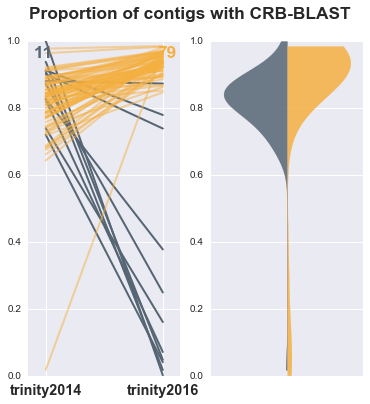

In [9]:
p_refs_with_CRBB, fig, ax = create_plots(trinity2014_v_trinity2016,trinity2016_v_trinity2014, 'p_refs_with_CRBB', 'Proportion of contigs with CRB-BLAST')

In [14]:
p_refs_with_CRBB.loc[p_refs_with_CRBB.trinity2016 < p_refs_with_CRBB.trinity2014]

,trinity2014,trinity2016
Run,,
MMETSP1130,0.82376,0.07096
MMETSP0933,0.91245,0.77906
MMETSP0229,0.87227,0.24889
MMETSP0937,0.93790,0.04776
MMETSP1473,0.90124,0.73852
MMETSP0452,1.00000,0.00161
MMETSP0329,0.71970,0.04072
MMETSP0044,0.82707,0.37736
MMETSP1128,0.88020,0.87294


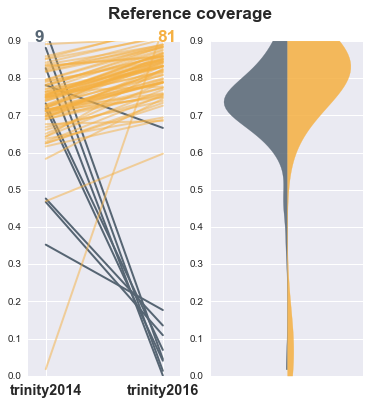

In [10]:
reference_coverage, fig, ax = create_plots(trinity2014_v_trinity2016,trinity2016_v_trinity2014, 'reference_coverage', 'Reference coverage'
                                           , ymax = 0.9, ypos = 0.9)

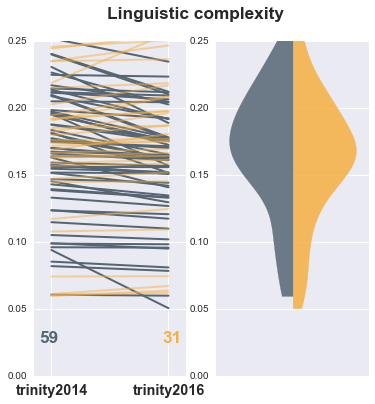

In [11]:
linguistic_complexity, fig, ax = create_plots(trinity2014_v_trinity2016,trinity2016_v_trinity2014,  'linguistic_complexity', 'Linguistic complexity', ymax=0.25, ypos=0.025)

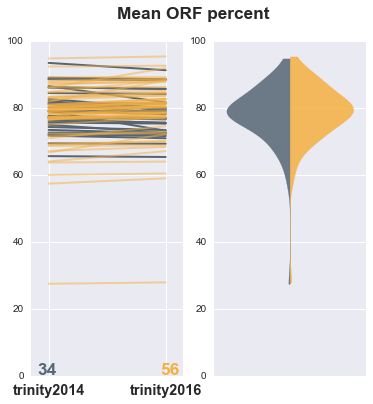

In [12]:
mean_orf_percent, fig, ax = create_plots(trinity2014_v_trinity2016,trinity2016_v_trinity2014,  'mean_orf_percent', 'Mean ORF percent',ymax=100, ypos=0.5)

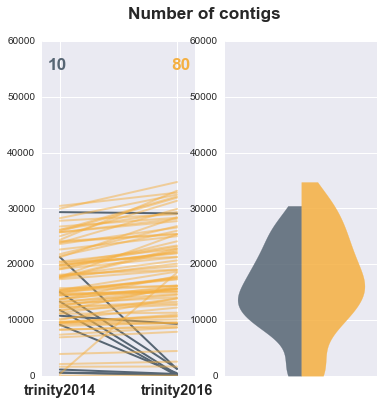

In [13]:
n_seqs, fig, ax = create_plots(trinity2014_v_trinity2016,trinity2016_v_trinity2014, 'n_seqs', 'Number of contigs',ymax=60000, ypos=55000)